<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [20]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-08-17 07:24:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  44.7MB/s    in 0.8s    

2023-08-17 07:24:36 (44.7 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [21]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [22]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import plotly.express as px
import plotly.graph_objects as go

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0



Matplotlib version:  3.5.3


## Demo: How to run an sql query


In [23]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [24]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [25]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [26]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


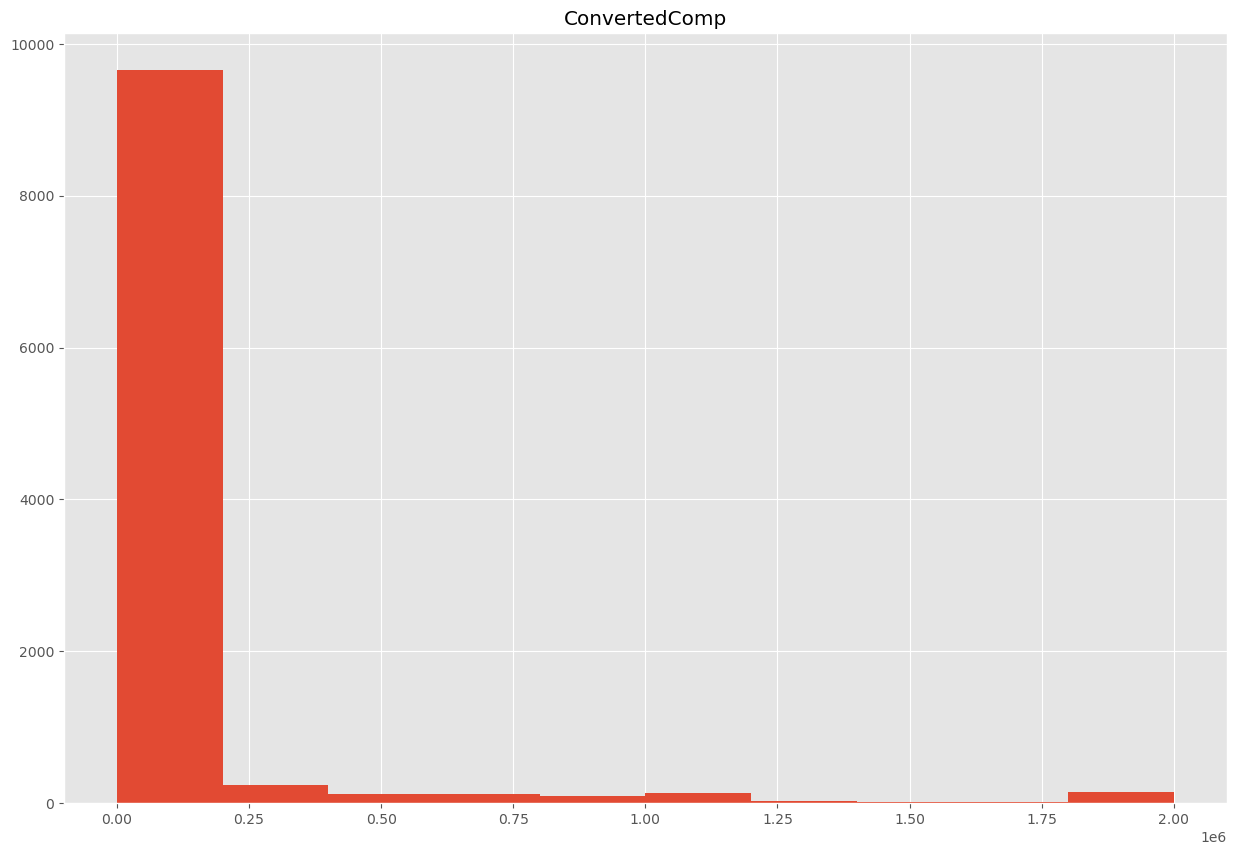

In [8]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df['ConvertedComp'].plot(kind='hist',figsize=(15,10))
plt.title('ConvertedComp')
plt.xlabel('')
plt.ylabel('')

plt.show()

### Box Plots


Plot a box plot of `Age.`


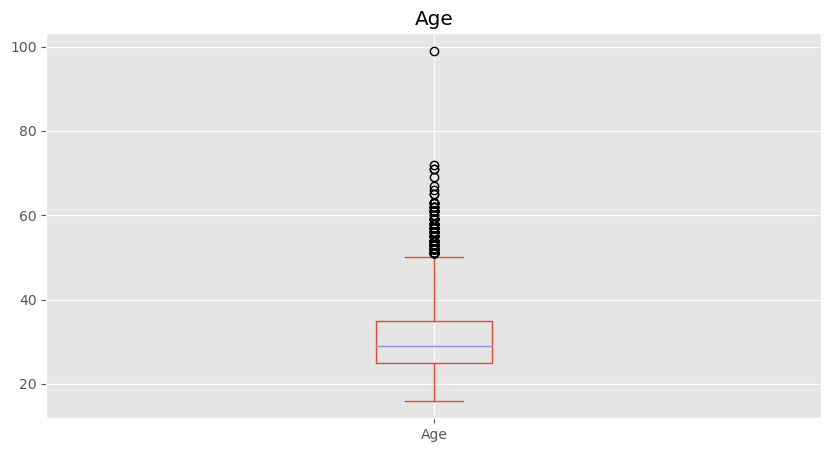

In [9]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df['Age'].plot(kind='box', figsize=(10,5))
plt.title('Age')
plt.xlabel('')
plt.ylabel('')

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


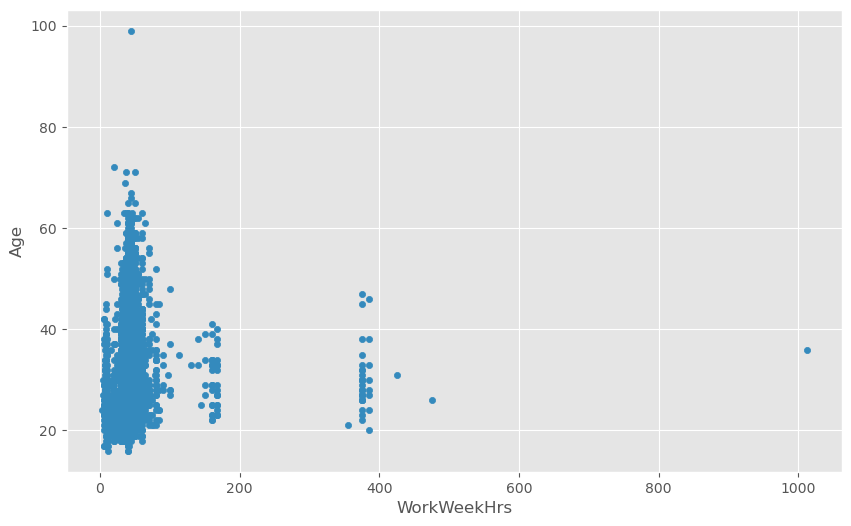

In [10]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.plot


df.plot(kind='scatter', x='WorkWeekHrs', y='Age', figsize=(10, 6))
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


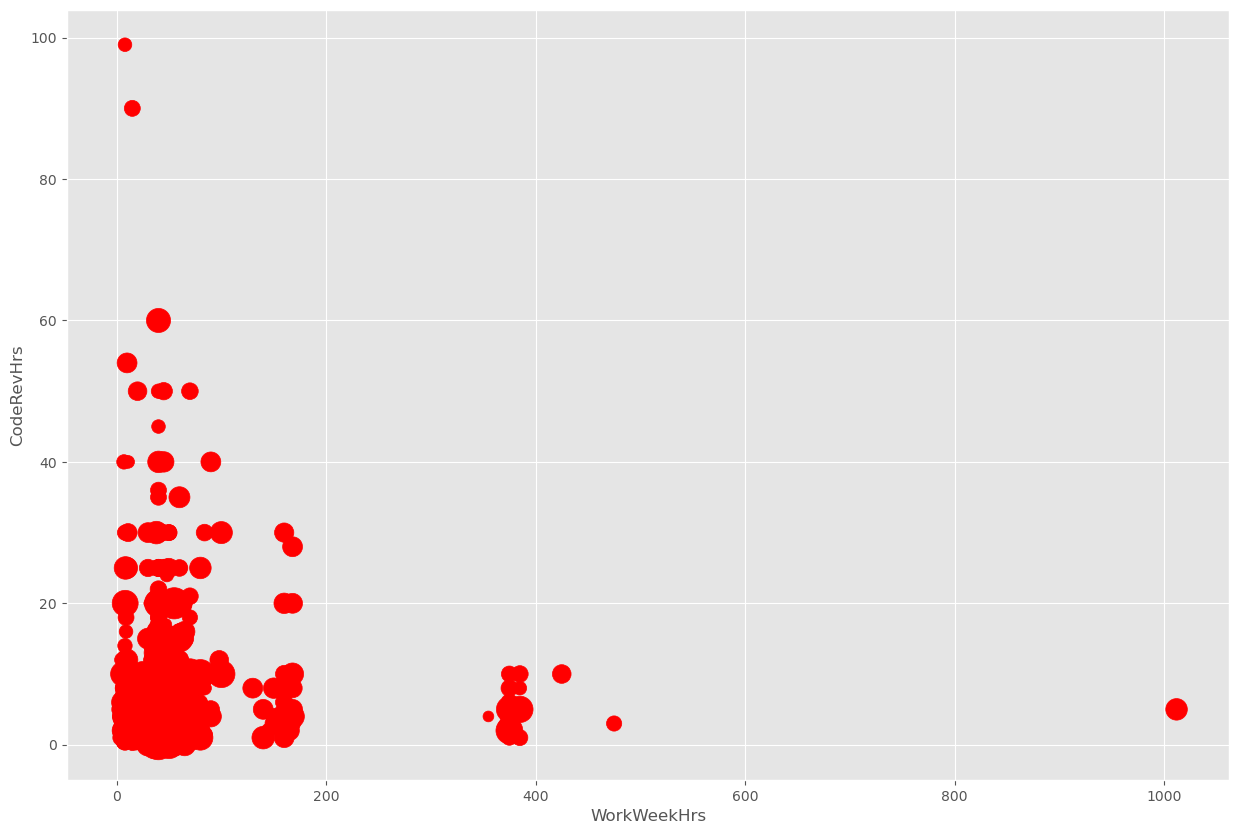

In [11]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df.plot(kind='scatter', x="WorkWeekHrs", y="CodeRevHrs", s=norm_age*1000, color='red', figsize=(15,10))
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [12]:
QUERY = """

select count(DatabaseDesireNextYear) as Count,DatabaseDesireNextYear from DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(DatabaseDesireNextYear)  

"""

df2=pd.read_sql_query(QUERY,conn)

df2.set_index('DatabaseDesireNextYear',inplace=True)

df2



,Count
DatabaseDesireNextYear,
Couchbase,390
Other(s):,645
Oracle,870
Cassandra,1003
DynamoDB,1044
MariaDB,1385
Firebase,1650
SQLite,2437
Microsoft SQL Server,2706


In [62]:
QUERY="""
SELECT DevType from DevType"""

df=pd.read_sql_query(QUERY,conn)
df['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

In [56]:
QUERY="""
SELECT DatabaseWorkedWith,count(Respondent)
FROM DatabaseWorkedWith
group by Respondent having count(DatabaseWorkedWith)=1 and DatabaseWorkedWith='MySQL'"""
df2=pd.read_sql_query(QUERY,conn)
df2

,DatabaseWorkedWith,count(Respondent)
0,MySQL,1
1,MySQL,1
2,MySQL,1
3,MySQL,1
4,MySQL,1
...,...,...
469,MySQL,1
470,MySQL,1
471,MySQL,1
472,MySQL,1


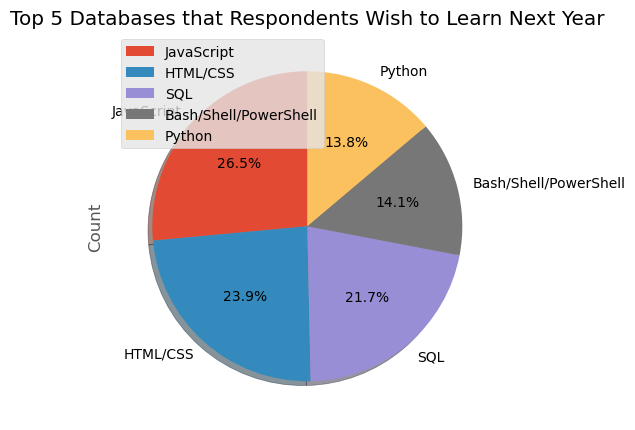

In [14]:
QUERY = """5469

select count(LanguageWorkedWith) as Count,LanguageWorkedWith from LanguageWorkedWith group by LanguageWorkedWith order by count(LanguageWorkedWith) DESC LIMIT 5

"""

df2=pd.read_sql_query(QUERY,conn)

df2.set_index('LanguageWorkedWith',inplace=True)

df2

df2.plot(kind='pie',subplots=True,figsize=(5, 6),autopct='%1.1f%%',startangle=90,shadow=True)

plt.title('Top 5 Databases that Respondents Wish to Learn Next Year')
plt.legend(labels=df2.index, loc='upper left') 


plt.show()



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


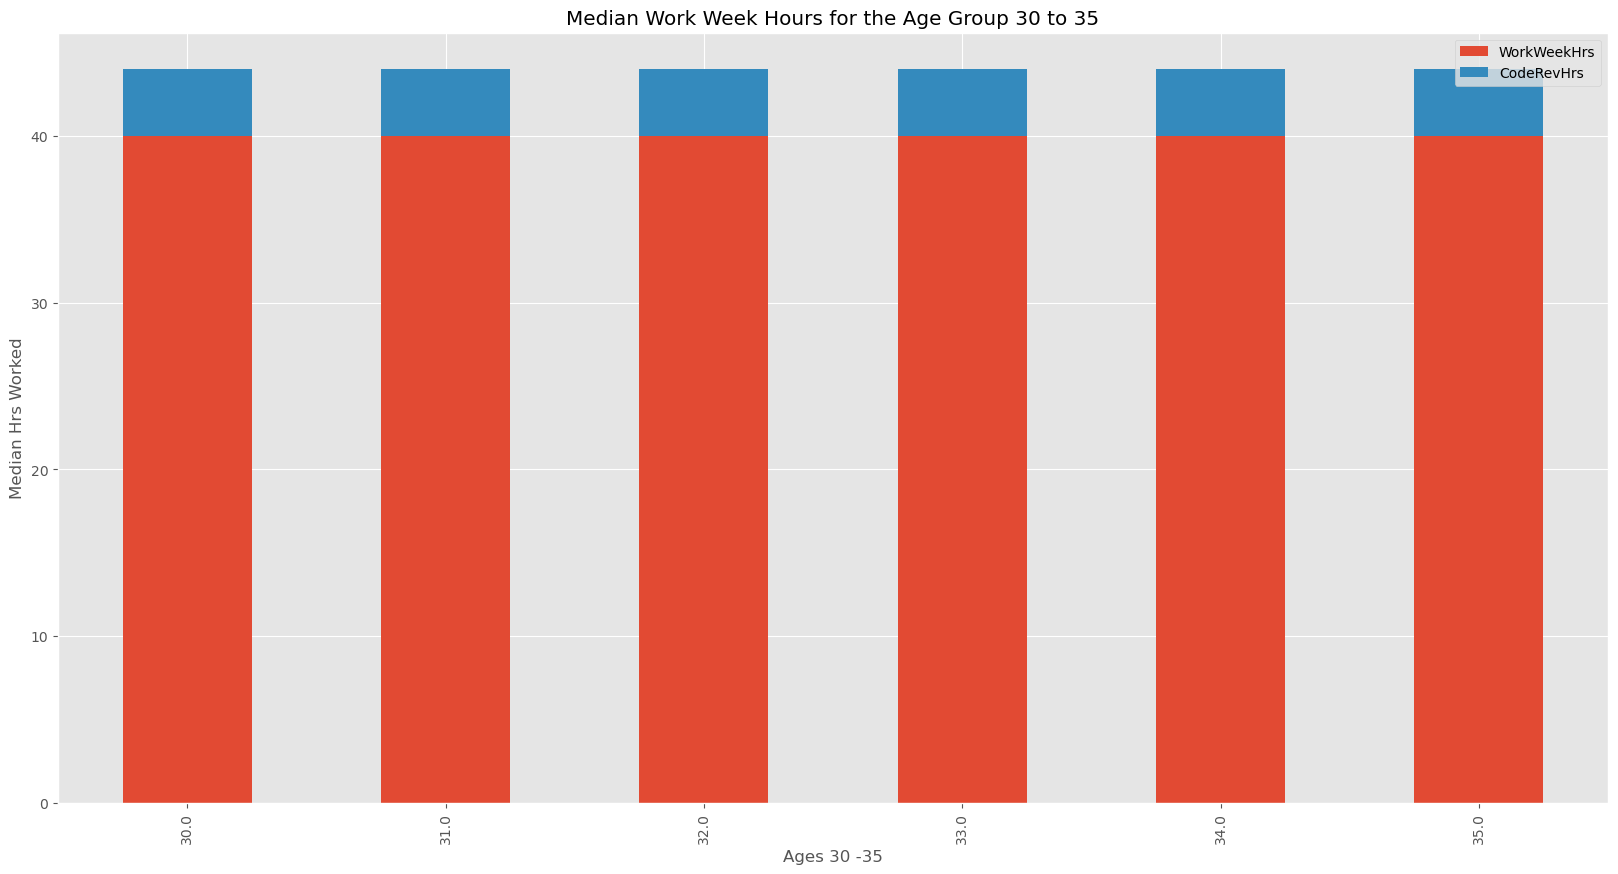

In [15]:
# your code goes here
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age  
FROM master WHERE Age BETWEEN 30 AND 35
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df1=df.groupby('Age').median()

df1.plot(kind='bar',
             stacked=True,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Median Work Week Hours for the Age Group 30 to 35')
plt.ylabel('Median Hrs Worked')
plt.xlabel('Ages 30 -35')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


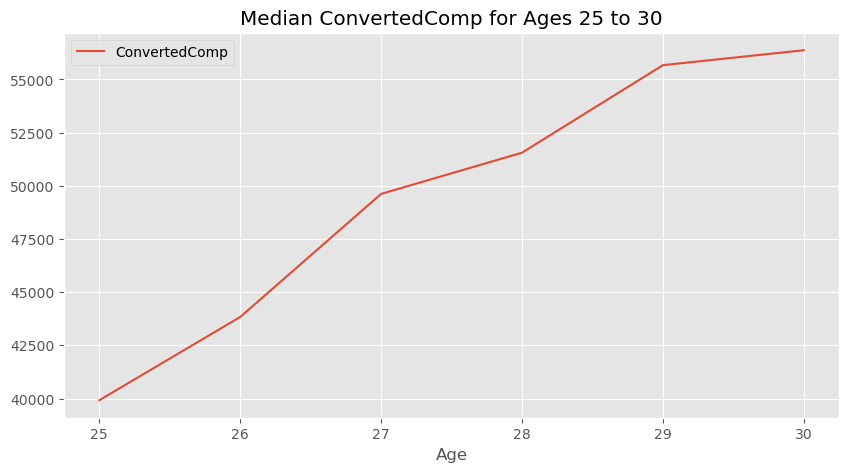

In [57]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master WHERE Age BETWEEN 25 AND 30
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df2=df.groupby('Age').median()
df2.plot(kind='line', figsize=(10,5))
plt.title('Median ConvertedComp for Ages 25 to 30')
plt.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


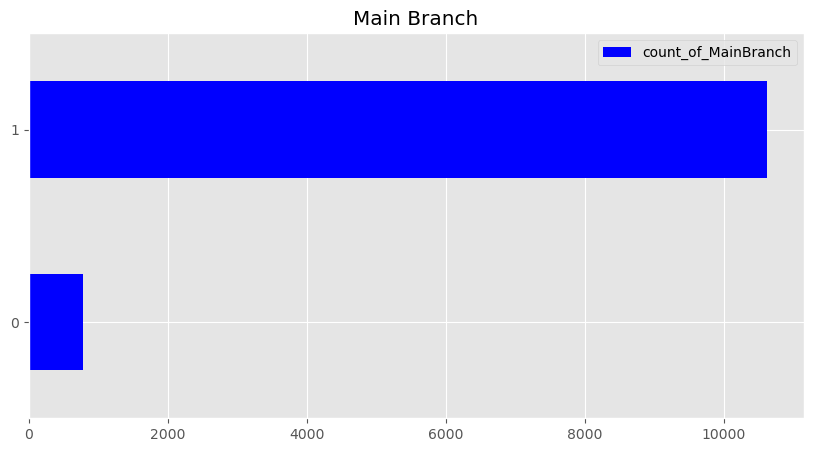

In [17]:
QUERY = """
SELECT MainBranch,COUNT(MainBranch) as count_of_MainBranch
FROM master
group by MainBranch
order by count_of_MainBranch"""

df = pd.read_sql_query(QUERY,conn)


df.plot(kind='barh', figsize=(10,5), color='blue')
    
plt.title('Main Branch')

plt.show()

Close the database connection.


In [18]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
